# INTRODUCTION

This case study is the Capstone Project of **Google Data Analytics Professional Certificate** using Python. 


The **6 steps of Data Analysis** is used to present this analysis.


Title: **Bellabeat Case Study**

Author: Ahmed El Wakeel

# STEP 1: ASK

#### 1.1 Background
Bellabeat is a high-tech manufacturer of beautifully-designed health-focused smart products for women since 2013. Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females.

The co-founder and Chief Creative Officer, Urška Sršen is confident that an analysis of non-Bellebeat consumer data (ie. FitBit fitness tracker usage data) would reveal more opportunities for growth.

#### 1.2 Business Task:
Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.

#### 1.3 Business Objectives:  
1. What are the trends identified?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

#### 1.4 Deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of analysis
5. Supporting visualizations and key findings
6. High-level content recommendations based on the analysis

#### 1.5 Key Stakeholders:
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
3. Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.

# STEP 2: PREPARE


#### 2.1 Information on Data Source:
1. The data is publicly available on [Kaggle: FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) and stored in 18 csv files. 
2. Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
3. 30 FitBit users who consented to the submission of personal tracker data.
4. Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.

    
#### 2.2 Limitations of Data Set:
1. Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
2. Sample size of 30 female FitBit users is not representative of the entire female population. 
3. As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.


#### 2.3 Is Data ROCCC?

A good data source is ROCCC which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.
1. Reliable - LOW - Not reliable as it only has 30 respondents
2. Original - LOW - Third party provider (Amazon Mechanical Turk)
3. Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
4. Current - LOW - Data is 5 years old and is not relevant
5. Cited - LOW - Data collected from third party, hence unknown

Overall, the dataset is considered bad quality data and it is not recommended to produce business recommendations based on this data.

# STEP 3: PROCESS

We are using Python to prepare and process the data.


#### 3.1 Preparing the Environment

The ```numPy, pandas, matplotlib, datetime``` packages are installed and aliased for easy reading.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#### 3.2 Importing data set

In [2]:
# read_csv function to read the required CSV file
df = pd.read_csv("dailyActivity_merged.csv")

#### 3.3 Data cleaning and manipulation

In [3]:
# preview first rows with all columns
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# Getting the shape of the data frame
df.shape

(940, 15)

In [5]:
# using .info() function to get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Data has no null values

ActivityDate Column data type is incorrect

In [6]:
len(df['Id'].unique())

33

In [7]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"], format="%m/%d/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [8]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [9]:
# create new column "day_of_the_week" to represent day of the week 
df["DayOfWeek"] = df["ActivityDate"].dt.day_name()

In [10]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [11]:
df['Total_Minutes']=df['VeryActiveMinutes']+df['FairlyActiveMinutes']+df['LightlyActiveMinutes']+df['SedentaryMinutes']
df['Total_Hours']=round(df['Total_Minutes']/60)

In [12]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Total_Minutes,Total_Hours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094,18.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033,17.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440,24.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998,17.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040,17.0


# STEP 4: ANALYZE

#### 4.1 Perform calculations

Pulling the statistics of df_activity for analysis:
* count - no. of rows
* mean (average)
* std (standard deviation)
* min and max
* percentiles 25%, 50%, 75%

In [13]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Minutes,Total_Hours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


Interpreting statistical findings:

1. On average, users logged 7,637 steps or 5.4km which is not adequate. As recommended by CDC, an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. [Source: Medical News Today article](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day)

2.  Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.

3. Noting that average calories burned is 2,303 calories equivalent to 0.6 pound. Could not interpret into detail as calories burned depend on several factors such as the age, weight, daily tasks, exercise, hormones and daily calorie intake. [Source: Health Line article](https://www.healthline.com/health/fitness-exercise/how-many-calories-do-i-burn-a-day#Burning-calories)

***



# STEP 5: SHARE

In this step, we are creating visualizations and communicating our findings based on our analysis.

#### 5.1 Data Visualisation and Findings

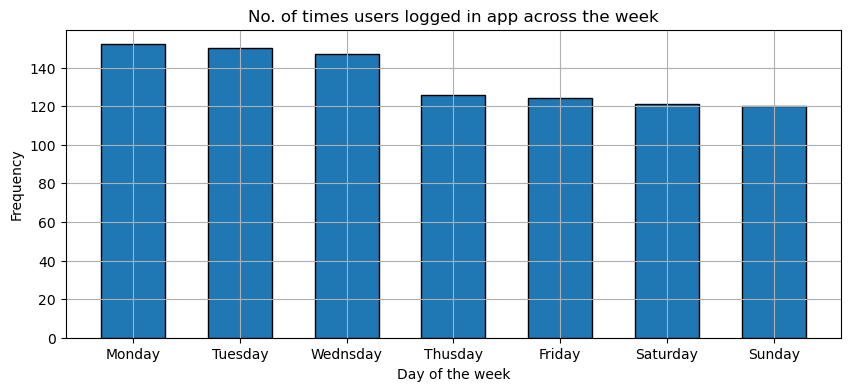

In [14]:
import matplotlib.pyplot as plt

# prepare data
day_counts = df['DayOfWeek'].value_counts()

# plot bar chart
plt.style.use("default")
plt.figure(figsize=(10,4))
plt.bar(x=day_counts.index, height=day_counts.values, width=0.6, edgecolor="black")

# add annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednsday', 'Thusday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()


##### **Frequency of usage across the week**

In this bar chart, we are looking at the frequency of FitBit app usage in terms of days of the week. 

1. We discovered that users prefer to track their activity on the app during midweek from Tuesday to Friday. 

2. Least Frequency of usage is on Friday and weekend days. 

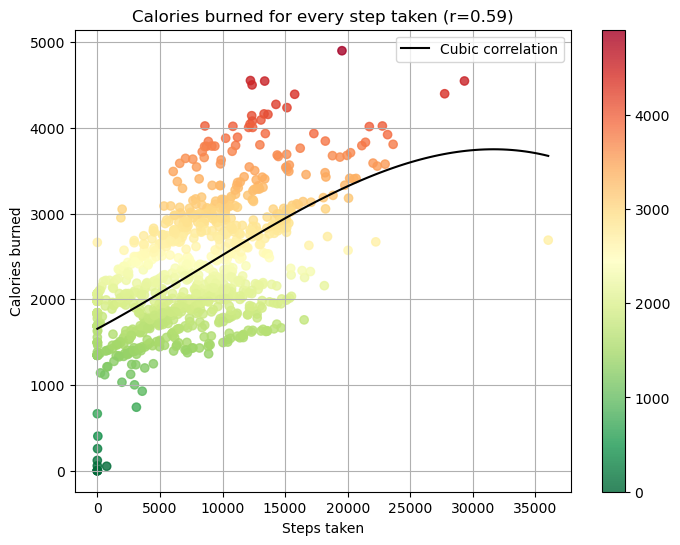

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation coefficient
r = np.corrcoef(df['TotalSteps'], df['Calories'])[0,1]

# Plot the scatter plot with colorbar and annotations
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df['TotalSteps'], df['Calories'], alpha=0.8, c=df['Calories'], cmap="RdYlGn_r")
plt.colorbar(orientation="vertical")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title(f"Calories burned for every step taken (r={r:.2f})")

# Plot the cubic correlation
x = np.linspace(df['TotalSteps'].min(), df['TotalSteps'].max(), 100)
p = np.poly1d(np.polyfit(df['TotalSteps'], df['Calories'], 3))
y = p(x)
plt.plot(x, y, color='black', label='Cubic correlation')
plt.legend()

plt.grid(True)
plt.show()


##### **Calories burned for every step taken**

From the scatter plot, we discovered that:

1. It is a positive correlation, r=0.59.

2. We observed that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards. 

3. Noted a few outliers:
    - Zero steps with zero to minimal calories burned. 
    - 1 observation of > 35,000 steps with < 3,000 calories burned.
    - Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human error).

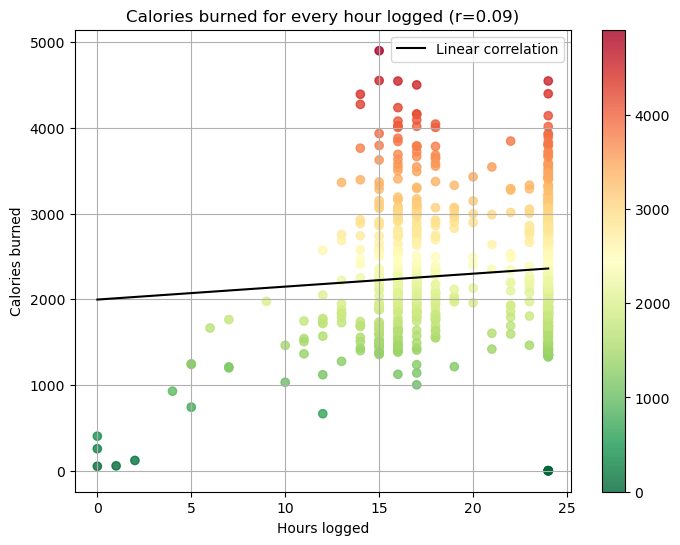

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation coefficient
r = np.corrcoef(df['Total_Hours'], df['Calories'])[0,1]

# Plot the scatter plot with colorbar and annotations
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df['Total_Hours'], df['Calories'], alpha=0.8, c=df['Calories'], cmap="RdYlGn_r")
plt.colorbar(orientation="vertical")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title(f"Calories burned for every hour logged (r={r:.2f})")

# Plot the cubic correlation
x = np.linspace(df['Total_Hours'].min(), df['Total_Hours'].max(), 100)
p = np.poly1d(np.polyfit(df['Total_Hours'], df['Calories'], 1))
y = p(x)
plt.plot(x, y, color='black', label='Linear correlation')
plt.legend()

plt.grid(True)
plt.show()

##### **Calories burned for every hour logged**

The scatter plot is showing:

1. A weak positive correlation whereby the increase of hours logged does not translate to more calories being burned. That is largely due to the average sedentary hours (purple line) plotted at the 16 to 17 hours range. 

2. Again, we can see a few outliers:
   - The same zero value outliers
   - An unusual red dot at the 24 hours with zero calorie burned which may be due to the same reasons as above.

In [30]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'DayOfWeek',
       'Total_Minutes', 'Total_Hours'],
      dtype='object')

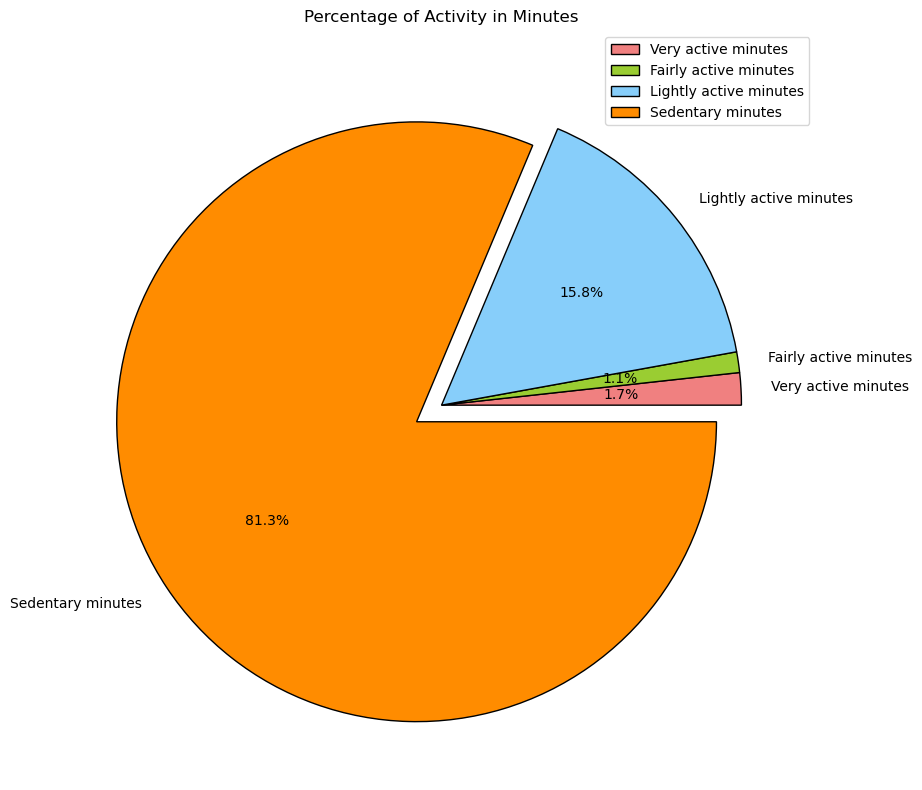

In [38]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

# calculating total of individual minutes column
very_active_mins = df["VeryActiveMinutes"].sum()
fairly_active_mins = df["FairlyActiveMinutes"].sum()
lightly_active_mins = df["LightlyActiveMinutes"].sum()
sedentary_mins = df["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.figure(figsize=(10, 8))
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

**Percentage of Activity in Minutes**

As seen from the pie chart, 

1. Sedentary minutes takes the biggest slice at 81.3%. 

2. This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands. 

3. App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

# STEP 6: ACT

In the final step, we will be delivering our insights and providing recommendations based on our analysis. 

Here, we revisit our business questions and share with you our high-level business recommendations.
 
**1. What are the trends identified?**

* Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.

* Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends. 

**2. How could these trends apply to Bellabeat customers?**

* Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can very well abe pplied to Bellabeat customers.

**3. How could these trends help influence Bellabeat marketing strategy?**

* Bellabeat marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.

* On weekends, Bellabeat app can also prompt notification to encourage users to exercise.


***

